In [1]:
# import laibreris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# read file
df = pd.read_csv('crime_data.csv')

In [3]:
df.head()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


In [4]:
# check null values
df.isnull().sum()

,0
DR_NO,0
Date_Rptd,0
DATE_OCC,0
AREA_NAME,0
Crm_Cd,0
Crm_Cd_Desc,0
Vict_Age,0
Vict_Sex,27
Premis_Desc,0
Status,0


In [5]:
#check mode and fill missing value
df['Vict_Sex'].mode()[0]

'M'

In [6]:
df['Vict_Sex'] = df['Vict_Sex'].fillna(df['Vict_Sex'].mode()[0])

In [7]:
df.isnull().sum()

,0
DR_NO,0
Date_Rptd,0
DATE_OCC,0
AREA_NAME,0
Crm_Cd,0
Crm_Cd_Desc,0
Vict_Age,0
Vict_Sex,0
Premis_Desc,0
Status,0


In [8]:
df['OCC_Month'] = pd.to_datetime(df['DATE_OCC']).dt.strftime('%B')

In [9]:
df['Rptd_Month'] = pd.to_datetime(df['Date_Rptd']).dt.strftime('%B')

In [10]:
df.head()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON,OCC_Month,Rptd_Month
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30,January,January
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25,January,January
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40,January,January
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45,January,January
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26,January,January


In [17]:
df['Crm_Cd'].count()

499

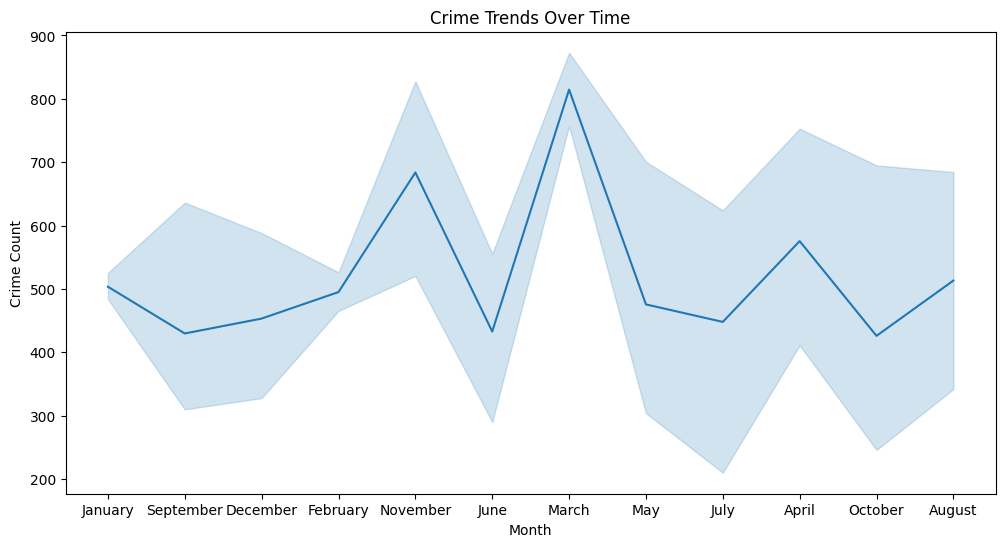

In [11]:
# Identify Trends
# In this chart we see the Criethrend over the Months
plt.figure(figsize=(12, 6))
sns.lineplot(x='Rptd_Month', y='Crm_Cd', data=df)
plt.title('Crime Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.show()


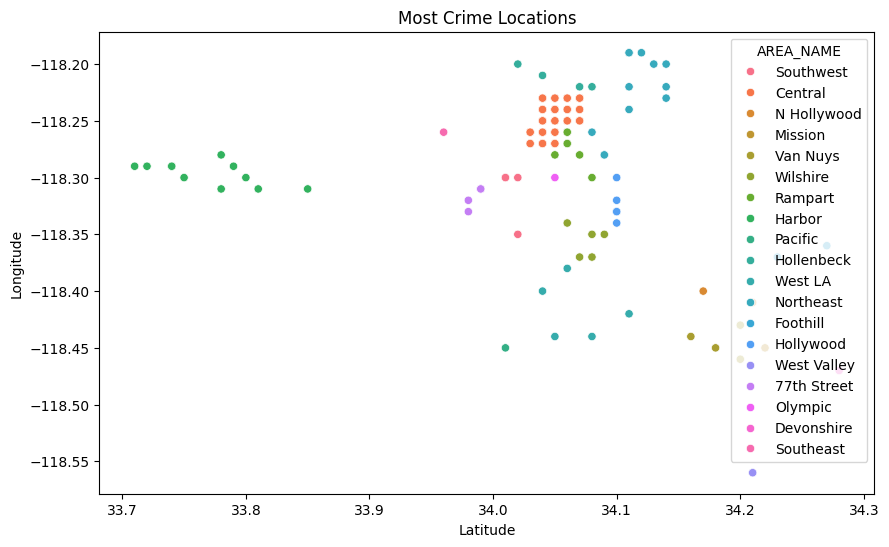

In [12]:
# Most Crime Locations

# In this chart We clearly see Top5 Crime location(Southwest, Central,N Hollywood, Mission and Van Nuys)

plt.figure(figsize=(10, 6))
sns.scatterplot(x="LAT",y='LON', data=df, hue='AREA_NAME')
plt.title('Most Crime Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

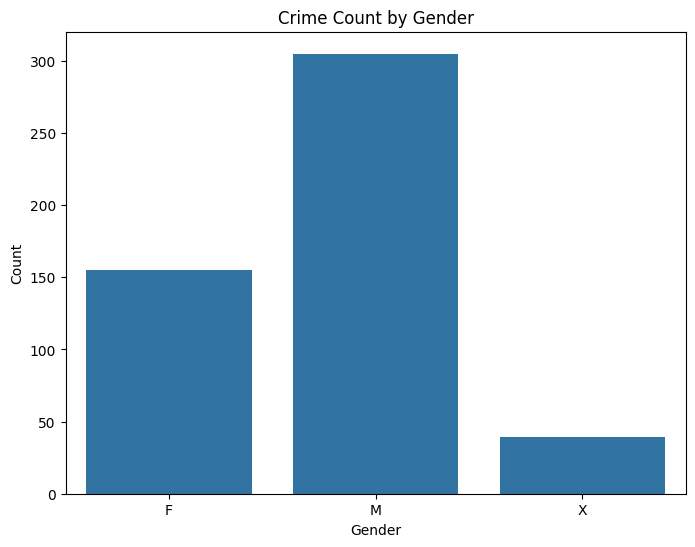

In [13]:
# Crime Count by Gender

# In this plot We Clearly see the most of Victims are Males.

plt.figure(figsize=(8, 6))
sns.countplot(x='Vict_Sex', data=df)
plt.title('Crime Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


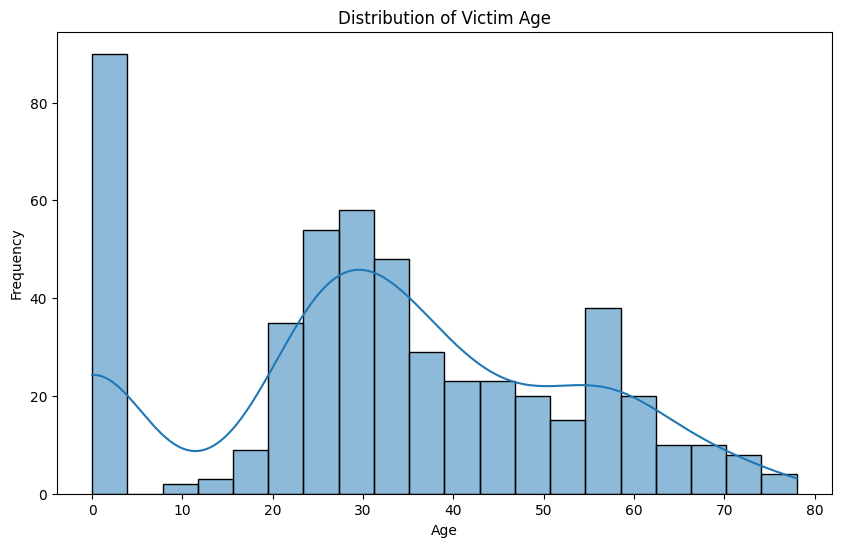

In [14]:
# Distibution of Victim Age
#
# We Clearly See the Most of the Victims are 1 to 5 years

plt.figure(figsize=(10, 6))
sns.histplot(df['Vict_Age'], bins=20, kde=True)
plt.title('Distribution of Victim Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Month')

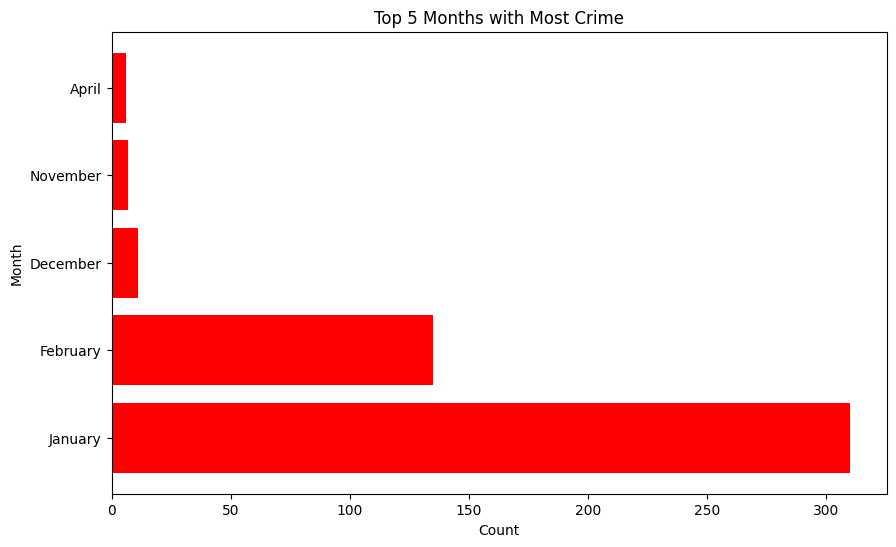

In [15]:
# Give the Top 5 Months which Crime is most Active
plt.figure(figsize=(10, 6))
# Use 'y' for the values and 'width' for the bar widths
plt.barh(y=df['Rptd_Month'].value_counts().head(5).index, width=df['Rptd_Month'].value_counts().head(5).values,color='red')
plt.title('Top 5 Months with Most Crime')
plt.xlabel('Count')
plt.ylabel('Month')

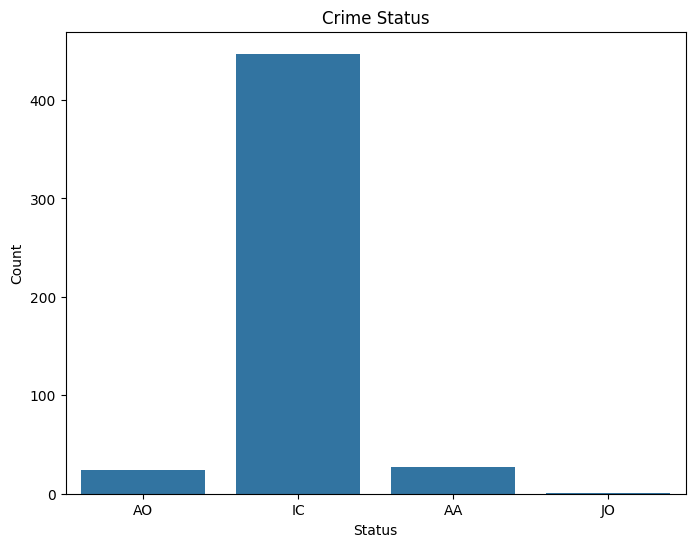

In [16]:
# Crime Status
# In this Chart we clearly see the Most of the Crime Status are Close

plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df)
plt.title('Crime Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

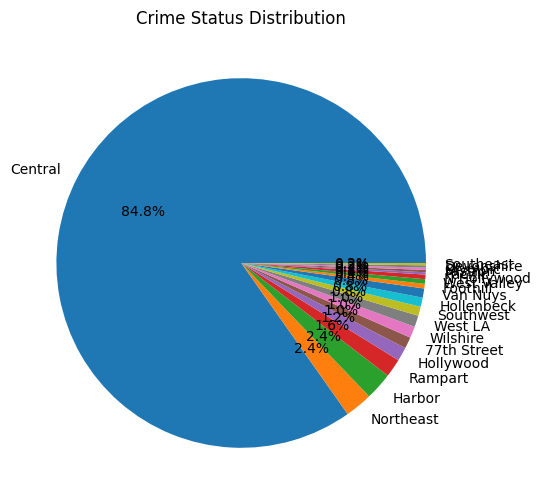

In [31]:
# In this Chart We See the Central is the most of the Crime Location
plt.figure(figsize=(10, 6))
plt.pie(df['AREA_NAME'].value_counts(), labels=df['AREA_NAME'].value_counts().index, autopct='%1.1f%%')
plt.title('Crime Status Distribution')
plt.show()

In [26]:
# Create The Age Group

def age_group(age):
  if age <= 18:
    return "Teenager"
  elif age >= 18 and age < 60:
    return "Adult"
  else:
    return "Senior"

df["Age_Group"] = df['Vict_Age'].apply(age_group)

Text(0, 0.5, 'Count')

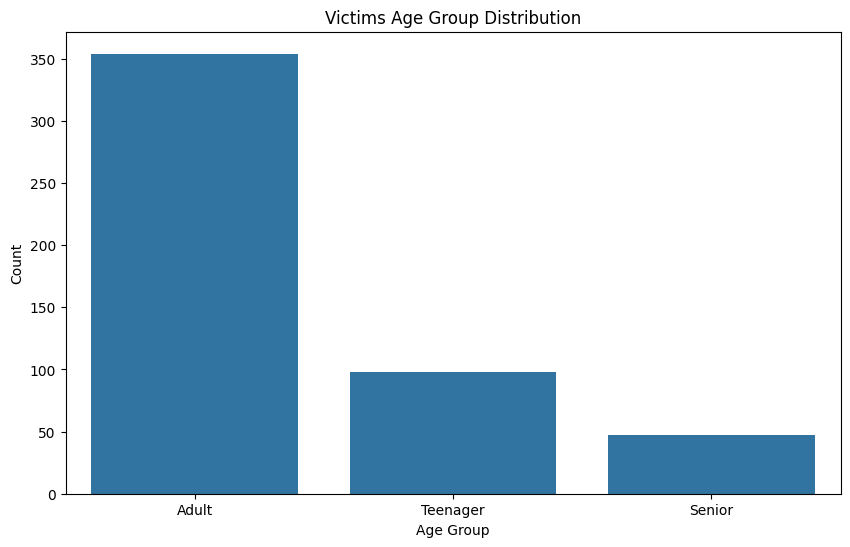

In [30]:
# Most the victims are Tinagers
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Age_Group'].value_counts().index, y=df['Age_Group'].value_counts().values)
plt.title('Victims Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')